In [65]:
#this is a script for compiling data that has been fully parallelized on the cluster. 

import pandas as pd
import matplotlib.pyplot as plt
import string
import fnmatch
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import statistics
import paramiko
from paramiko import SSHClient
from scp import SCPClient


In [81]:
#Local variables: figure out how to automate.
JobIDint = 7358338
JOBID = str(JobIDint)
tree_sizes_1 = list(range(10,600,5))
tree_sizes_2 = []
tree_sizes = tree_sizes_1 + tree_sizes_2
print(tree_sizes)
#tree_sizes = [10,25,50,75,100,350,500,700,900,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000] # define the tree sizes that we have data for (aka: parameter combinations)
metric = 'mpd'
num_files = 1 #predetermine the number of files/runs. This is equivalent to the array_ID from the r script. 
transfer = True;

[10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580, 585, 590, 595]


In [73]:
#establish connection with remote server and transfer files from filenam
#DO NOT RUN THIS UNLESS THE FILES HAVE NOT BEEN TRANSFERRED

if(transfer):
    hoffman2_path_output = '/u/home/m/mchari/bird/Parallel_Hoffman_full/' + JOBID + '_output_files'
    ssh_ob = SSHClient()
    ssh_ob.load_system_host_keys()
    ssh_ob.connect('hoffman2.idre.ucla.edu', username = 'mchari', password= 'Xf4p4D24')
    scp = SCPClient(ssh_ob.get_transport())
    scp.get(hoffman2_path_output, recursive = True)
    print("transfer is done")
    transfer = False;
else:
    print("transfer already complete")
    
#set up local direrctory and establish folder as target
cwd = os.getcwd()
target_directory = os.getcwd() + "/"+ JOBID +"_output_files/"

transfer is done


In [ ]:
#for some reason, only went until 430 

In [37]:
print(target_directory)
#look at one mpd randomization from one trial to see sample data structure. 
target_file_get = target_directory +  "100_3992out.csv"
print(target_file_get)
df = pd.read_csv(target_file_get)
df.index =['pd', 'mpd', "mntd"]
print(df)
#df.iloc[0]['mpd.rnd']

stat_temp = df.loc['mpd']
print(stat_temp)


/Users/mayachari/Desktop/bird/Parallel_Hoffman_full/7346854_output_files/
/Users/mayachari/Desktop/bird/Parallel_Hoffman_full/7346854_output_files/100_3992out.csv
           trial     trial.1     trial.2     trial.3     trial.4
pd    489.262441  519.645144  437.474465  464.035728  432.295552
mpd    88.241526   81.519488   80.919770   79.850588   82.348477
mntd   27.043924   20.634463   25.568045   25.102002   23.103256
trial      88.241526
trial.1    81.519488
trial.2    80.919770
trial.3    79.850588
trial.4    82.348477
Name: mpd, dtype: float64


In [45]:
# Create dictionary class

class my_dictionary(dict):
 
  # __init__ function
  def __init__(self):
    self = dict()
 
  # Function to add key:value
  def add(self, key, value):
    self[key] = value


In [82]:

#right now the mean part of this function is redundant but I'm keeping it in just in case. 
#avg_mpd_rand = []

#choice of 2 statistics: mpd, mntd
def div_stats(tree_sizes, JobIDint, target_directory, target_statistic):
    dict_mpd = my_dictionary() #initialize new dictionary 
    
    #i don't know why i did it this way. can't remember. 
    if target_statistic == "mpd":
        target_val = 'mpd'
    elif target_statistic == "mntd":
        target_val = 'mntd'
    elif target_statistic == "pd":
        target_val = 'pd'
    else:
        print("error") #add an error
    for i in tree_sizes:
        size = str(i) #gets the i'th data. 
        count = 0
        mpd_sum = 0
        array_temp = []
        name = target_statistic + str(i)
        for file in os.listdir(target_directory): #search every file in the target directory. 
            if file.startswith(size + "_"):
                direct = target_directory + file #go to the directory
                temp_df = pd.read_csv(direct) #read in the csv. 
                temp_df.index =['pd', 'mpd', "mntd"]
                stat_temp = temp_df.loc[target_val]
                #mpd_sum = mpd_sum + temp_df.iloc[0][target_val]
                #count  = count + 1
                array_temp.extend(stat_temp)
        #average_mpd_rnd.append(mpd_sum/count)
        dict_mpd.add(name, array_temp)
    
    return dict_mpd
    
        #average_mpd_rnd.append(mpd.rand)




In [83]:
#TODO: write this to a csv somehow so I can delete that massive file. 

new_mpd_smallvals = div_stats(tree_sizes, JobIDint, target_directory, 'mpd')
new_mntd_smallvals = div_stats(tree_sizes, JobIDint, target_directory, 'mntd')
new_pd_smallvals = div_stats(tree_sizes, JobIDint, target_directory, 'pd')


In [84]:
#
new_mpd = new_mpd_smallvals
new_mntd = new_mntd_smallvals
new_pd = new_pd_smallvals

print(new_mpd)

{'mpd10': [57.8885309777778, 84.3381298444444, 80.2292319333333, 91.8121416666666, 94.4629796444444, 106.924814222222, 82.6514413111111, 85.1481053555555, 95.0258424, 72.8949567333333, 77.0773739111111, 103.994147755556, 76.7718039111111, 69.2656425333333, 102.784438311111, 100.5511798, 90.9716972888889, 82.0014319777778, 99.3216623777778, 100.426666533333, 83.3992483333333, 86.5977648888889, 91.2395522666666, 81.6583007111111, 85.8831219777778, 65.2760374888889, 87.9544890444444, 92.2223876444444, 84.2263936, 75.4353880444444, 61.0501579555556, 75.2481427111111, 90.2022019555555, 96.1337215111111, 67.5995162888889, 99.2592593555556, 78.7511110666667, 84.7105110444444, 92.7919903111111, 80.4146080222222, 82.7171747111111, 106.464406577778, 101.317154711111, 105.872384866667, 103.285507488889, 90.1572869555555, 111.328969977778, 104.104874622222, 102.1235082, 99.7735743777778, 106.121646355556, 79.3916317555556, 101.138727244444, 95.2194558666666, 102.065477933333, 90.5077762666667, 101

In [23]:
data = mpd['mpd10']
plt.hist(data, bins =30)
st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)) 


#using classical statistics and assuming normal distribution 
std = statistics.stdev(data)
mean = np.mean(data)
lower_level = mean-1.960*(std/(np.sqrt(len(data)+1)))
lower_level
upper_level = mean+1.960*(std/(np.sqrt(len(data)+1)))
upper_level
#X  ±  Z s√n 


upper_bound_bootstrap = np.percentile(data,97.5)
lower_bound_bootstrap = np.percentile(data,2.5)

print(lower_bound_bootstrap, upper_bound_bootstrap)



NameError: name 'mpd' is not defined

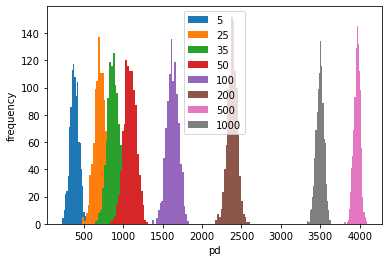

In [90]:
#print(dict_mpd.keys())
#print(np.mean(dict_mpd['mpd10']))
#print(np.mean(dict_mpd['mpd10']))
#print(new_mpd['mpd10'])
plt.hist(new_pd['pd10'],bins = 20)
#plt.hist(new_mpd['mpd10'],bins = 20)
#plt.hist(new_mpd['mpd15'],bins = 20)
#plt.hist(new_mpd['mpd20'],bins = 20)
plt.hist(new_pd['pd25'],bins = 20)
#plt.hist(new_mpd['mpd30'],bins = 20)
plt.hist(new_pd['pd35'],bins = 20)
#plt.hist(new_mpd['mpd40'],bins = 20)
#plt.hist(new_mpd['mpd45'],bins = 20)
plt.hist(new_pd['pd50'],bins = 20)
plt.hist(new_pd['pd100'],bins = 20)
plt.hist(new_pd['pd200'],bins = 20)
plt.hist(new_pd['pd500'],bins = 20)
plt.hist(new_pd['pd400'],bins = 20)
#plt.hist(new_mpd['mpd50'])
#plt.hist(new_mpd['mpd100'])
#plt.hist(new_mpd['mpd1000'])
#plt.title('expected pd histograms across multiple tree sizes')
plt.xlabel('pd')
plt.ylabel('frequency')
labels = ("5","25",  "35", "50", "100", "200", "500", "1000")
plt.legend(labels)
plt.savefig('pd_histograms.jpg', dpi=300)

In [49]:
#TODO: make function to get confidence interval and means. 
#CI TODO: check whether z or t is used. don't know variance or mean. Should use t distribution. 
def CI_conglomerate(dictionary): #assuming normal distribution
    low_array = []
    high_array = []
    mean_array = []
    for key in dictionary.keys():
        mean_temp = np.mean(dictionary[key])
        CI_temp = st.t.interval(confidence=0.95, df=len(dictionary[key])-1, loc=np.mean(dictionary[key]), scale=st.sem(dictionary[key]))
        low_array.append(CI_temp[0])
        high_array.append(CI_temp[1])
        mean_array.append(mean_temp)
    return(low_array,high_array,mean_array)

new_CI = CI_conglomerate(new_mpd)
print(new_CI)

([86.09994152804764, 83.99487847949561, 84.42849419341944, 83.69400976461814, 83.62761078670755, 83.07073701049613, 85.92467356725753, 85.66777047866213, 85.49414178682251, 85.06571320000972, 85.3334607659061, 84.9772851337717, 84.14971702547477, 84.65169942288492, 85.75047113319603, 85.74460652635972, 85.11215045007748, 85.5552052925727, 84.58543663197278, 84.9004388154135, 85.07134147181725, 84.6561929846243, 84.60543130984635, 85.91628075492325, 84.83497373278716, 85.14533045908082, 84.7828338951779, 85.19076942979741, 85.33938774240295, 85.48707120303483, 85.01970364242688, 84.91582640332176, 85.60569543283026, 84.30430789051994, 84.99224040225866, 86.11944393035421, 85.64043930070459, 85.12407913561768, 84.94567909273711, 85.33881378343244, 85.26482454539209, 85.46510613254725, 85.46899836411123, 84.87258723099714, 84.99760554107952, 85.07509694307622, 84.82192986779273, 85.16908910652364, 84.49722059664319, 85.14304986565662, 84.94156244029604, 84.82127358569691, 85.6939788229131

In [75]:
def CI_bootstrap(dictionary): #assuming normal distribution
    low_array = []
    high_array = []
    mean_array = []
    for key in dictionary.keys():
        print(key)
        data_temp = dictionary[key]
        upper_bound_bootstrap = np.percentile(data_temp,97.5)
        print(upper_bound_bootstrap)
        lower_bound_bootstrap = np.percentile(data_temp,2.5)
        low_array.append(lower_bound_bootstrap)
        high_array.append(upper_bound_bootstrap)
        mean_array.append(np.mean(dictionary[key]))
    return(low_array,high_array,mean_array)



In [85]:
CI_mpd_bootstrap = CI_bootstrap(new_mpd) #CI for mpd

CI_mntd_bootstrap = CI_bootstrap(new_mntd)  #CI for mntd

CI_pd_bootstrap = CI_bootstrap(new_pd)

mpd10
108.61885557277776
mpd15
105.21887874952353
mpd20
105.28117349710547
mpd25
101.62515638550032
mpd30
101.64416782689635
mpd35
99.80449467134454
mpd40
99.08056153378206
mpd45
98.82173542808077
mpd50
98.082505528898
mpd55
97.17170181508419
mpd60
97.45421973779663
mpd65
96.72612695286055
mpd70
96.39048865868531
mpd75
96.30196791118917
mpd80
96.00736164259497
mpd85
96.3428143235014
mpd90
95.02155279882645
mpd95
95.59573175482643
mpd100
94.98955898134344
mpd105
94.50748005576924
mpd110
94.46456801335276
mpd115
94.08678133822272
mpd120
94.5575931078431
mpd125
94.06428436310318
mpd130
94.17145894822005
mpd135
93.98225612925368
mpd140
93.73749859448358
mpd145
92.90636767537829
mpd150
92.92022988259957
mpd155
93.12271855779638
mpd160
93.8956721349607
mpd165
93.08618807788983
mpd170
92.93120445450396
mpd175
93.21354663762564
mpd180
93.42221221793297
mpd185
93.21049311713273
mpd190
92.75727731554855
mpd195
92.76022430015064
mpd200
92.2889155658316
mpd205
92.65696512658778
mpd210
92.286703342

In [54]:
#target_directory = os.getcwd() + "/"+ JOBID +"_output_files/"


#os.listdir(target_directory)

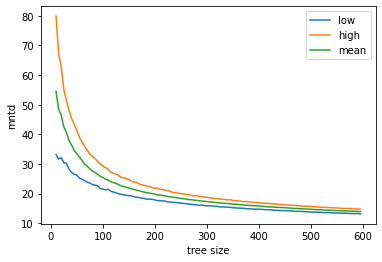

In [86]:
#print(average_mpd_rnd)

plt.plot(tree_sizes, CI_mntd_bootstrap[0])
plt.plot(tree_sizes, CI_mntd_bootstrap[1])
plt.plot(tree_sizes,CI_mntd_bootstrap[2])
labels2 = ("low", "high", "mean")
plt.ylabel("mnpd")
plt.xlabel("sample size")
#plt.title('95% CI for expected Mntd across tree sizes')
plt.xlabel('tree size')
plt.ylabel('mntd')
plt.legend(labels2)
plt.savefig('mntd_95CI_bird.jpg', dpi=300)



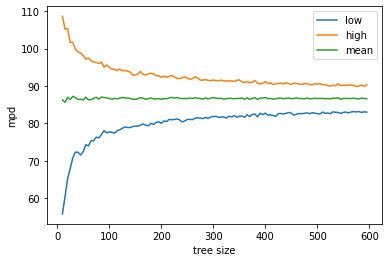

In [87]:
plt.plot(tree_sizes, CI_mpd_bootstrap[0])
plt.plot(tree_sizes, CI_mpd_bootstrap[1])
plt.plot(tree_sizes,CI_mpd_bootstrap[2])
labels2 = ("low", "high", "mean")
plt.ylabel("mpd")
plt.xlabel("sample size")
#plt.title('95% CI for expected Mpd across tree sizes')
plt.xlabel('tree size')
plt.ylabel('mpd')
plt.legend(labels2)
plt.savefig('mpd_95CI_bird.jpg', dpi=300)



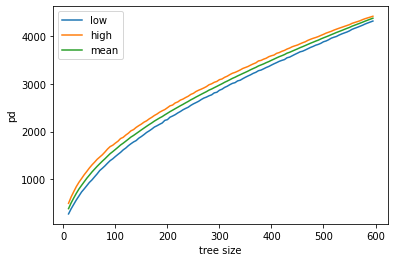

In [89]:
plt.plot(tree_sizes, CI_pd_bootstrap[0])
plt.plot(tree_sizes, CI_pd_bootstrap[1])
plt.plot(tree_sizes,CI_pd_bootstrap[2])
labels2 = ("low", "high", "mean")
plt.ylabel("pd")
plt.xlabel("sample size")
#plt.title('95% CI for expected [d] across tree sizes')
plt.xlabel('tree size')
plt.ylabel('pd')
plt.legend(labels2)
plt.savefig('pd_95CI_bird.jpg', dpi=1200)

In [62]:
CI_export_mpd = pd.DataFrame(CI_mpd_bootstrap)
CI_colnames = dict.keys(new_mpd)
CI_export_mpd.columns = CI_colnames
CI_export_mpd.index = ["Low", "High", "Mean"]
CI_export_mpd.to_csv("CI_mpd_output_bootstrap_bird.csv")


In [63]:
CI_export_mntd = pd.DataFrame(CI_mntd_bootstrap)
CI_colnames = dict.keys(new_mntd)
CI_export_mntd.columns = CI_colnames
CI_export_mntd.index = ["Low", "High", "Mean"]
CI_export_mntd.to_csv("CI_mntd_output_bootstrap_bird.csv")

In [64]:
CI_export_pd = pd.DataFrame(CI_pd_bootstrap)
CI_colnames = dict.keys(new_pd)
CI_export_pd.columns = CI_colnames
CI_export_pd.index = ["Low", "High", "Mean"]
CI_export_pd.to_csv("CI_pd_output_bootstrap_bird.csv")